## Processing corpus data using *NLTK*, *numpy*, and *matplotlib* 
At this point, we are ready to take our learned tools to look at some instances of real-world research applications for programming. In today's session, we will use several Python packages, specifically the Natural Language Toolkit (NLTK), NumPy, and MatPlotLib, to analyze large natural language corpora for the frequency of epistemic modal adverbs, English-German comparisons in word length, and a comparison of relative clause structures in English.

### Laying the ground work: used packages

#### NLTK

NLTK is yet another instance of a package for natural language processing (https://www.nltk.org/). It is more generalized than *polyglot*, housing a number of resources for dealing with any kind of human language data:

- interfaces to many corpora and lexical resources
- text processing libraries for classification, tokenization, stemming, tagging, parsing
- wrappers for industrial-strength NLP libraries
- great documentation

##### Installation and use

From the conda powershell, execute this command:

        conda install nltk

To download packages and corpora included in nltk, open a Python console and execute the following:

        import nltk
        nltk.download()

In the window that appears, double click on **book** and **popular** to download a selection of commonly used packages. Or browse the full selection of corpora and packages.

#### NumPy

NumPy is an extremely popular package for scientific computing in Python (https://numpy.org/). 

- provides a multidimensional array object
- ...along with derived objects (such as masked arrays and matrices)
- provides methods for fast operations on arrays (mathematical, shape manipulation, sorting, selecting, basic linear algebra, basic statistical operations)

##### Installation and use

The numpy packages comes as a pre-installed library (https://numpy.org/) with Anaconda/miniconda. To use it, just use the import statement:

        import numpy

#### Matplotlib

Matplotlib provides a comprehensive set of tools to visualize data in static, animated, or interactive plots (https://matplotlib.org/stable/index.html). 

##### Installation and use

From the conda powershell, execute this command:

        conda install matplotlib
      
Then use the import statement to use itin your python prgramme:

        import matplotlib

### Processing parallel corpus data using NLTK

NLTK can serve as **interface to a range of corpora** ( = huge natural language data bases, sometimes tagged and annotated for various properties, e.g., POS, dependency relations, text genre, ...). The *nltk.corpus* package provides *readers* that allow you to process diverse types of corpus data (https://www.nltk.org/howto/corpus.html).

Some of the corpora in NLTK include:

|Corpus |	Contents |
|---|---|
|Brown Corpus 	| 15 genres, 1.15M words, tagged, categorized |
|Project Gutenberg (selections)  |	18 literary texts, 2M words |
|Movie Reviews 	| 2k movie reviews with sentiment polarity classification |
|NPS Chat Corpus |	 	10k IM chat posts, POS-tagged and dialogue-act tagged |
|Question Classification 	|	6k questions, categorized |
|Shakespeare texts (selections) | 	8 books in XML format |
|Univ Decl of Human Rights 	|	480k words, 300+ languages |
|Penn Treebank (selections) | 	40k words, tagged and parsed |


We will look at a sample of the ***Europarl* corpus**, a parallel corpus of speeches in the proceedings of the European Parliament. The full corpus **includes versions in 21 European languages**: Romanic (French, Italian, Spanish, Portuguese, Romanian), Germanic (English, Dutch, German, Danish, Swedish), Slavik (Bulgarian, Czech, Polish, Slovak, Slovene), Finni-Ugric (Finnish, Hungarian, Estonian), Baltic (Latvian, Lithuanian), and Greek. NLTK includes a sample of 10 documents in 11 languages.

In [1]:
import nltk

from nltk.corpus import europarl_raw

#load any of the available language data
en = europarl_raw.english
ger = europarl_raw.german

ModuleNotFoundError: No module named 'nltk'

First, we should get an overview of the data we are dealing with. The **Europarl corpus data comes as a set of plaintext documents**. NLTK comes equipped with a **corpus reader method** that allow us to extract the following information: a **list of its words**, its **sentences** (as nested list of its sentences each being a list of words), or its **chapters** (as nested list of chapters each being a list of sentences as a list of words).

In [2]:
#let's find out how many words and sentences they contain. To do so, call the methods :
print(en.words()) #the method words() returns a list of words
print(ger.sents()) #the method sents() returns a list of sentences as nested lists

#the English version uses more words than the German one
print(len(en.words())) 
print(len(ger.words()))

['Resumption', 'of', 'the', 'session', 'I', 'declare', ...]
[['Wiederaufnahme', 'der', 'Sitzungsperiode', 'Ich', 'erkläre', 'die', 'am', 'Freitag', ',', 'dem', '17.', 'Dezember', 'unterbrochene', 'Sitzungsperiode', 'des', 'Europäischen', 'Parlaments', 'für', 'wiederaufgenommen', ',', 'wünsche', 'Ihnen', 'nochmals', 'alles', 'Gute', 'zum', 'Jahreswechsel', 'und', 'hoffe', ',', 'daß', 'Sie', 'schöne', 'Ferien', 'hatten', '.'], ['Wie', 'Sie', 'feststellen', 'konnten', ',', 'ist', 'der', 'gefürchtete', '"', 'Millenium-Bug', '"', 'nicht', 'eingetreten', '.'], ...]
556326
556226


Our goal will be to extract **frequency information** about words in each of these languages. We will first look at epistemic modal adverbs, that is, adverbs indicating the probability of the proposition they are modifying.

English and German have a large inventory of epistemic modal expressions, including adverbs ('possibly'), adjectives ('possible'), verbs ('might', 'must'), and particles (German *wohl*, roughly 'probably'). We can select a few and check how they are distributed within the corpus:  

In [3]:
fdist = nltk.FreqDist(w.lower() for w in en.words())

epistemic_modal_adverbs = ['maybe', 'probably', 'definitely', 'certainly', 'necessarily']
for m in epistemic_modal_adverbs:
    print('\n', m + ':', fdist[m], end=' ')

print('\n')

fdist2 = nltk.FreqDist(w.lower() for w in ger.words())
epistemic_modal_adverbs_ger = ['vielleicht','wahrscheinlich','definitiv','sicherlich','zwangsläufig']

for m in epistemic_modal_adverbs_ger:
    print('\n', m + ':', fdist2[m], end=' ')


 maybe: 8 
 probably: 53 
 definitely: 18 
 certainly: 173 
 necessarily: 28 


 vielleicht: 153 
 wahrscheinlich: 48 
 definitiv: 3 
 sicherlich: 80 
 zwangsläufig: 30 

In [4]:
i = 0
for w in en.sents():
    if 'necessarily' in w:
        print (i,w)
    i +=1

print('\n')
i = 0
for w in ger.sents():
    if 'zwangsläufig' in w:
        print (i,w)
    i +=1

583 ['Next', ',', 'we', 'all', 'too', 'often', 'see', 'vast', 'sums', 'of', 'money', 'being', 'spent', 'on', 'projects', 'whose', 'outcomes', 'will', 'necessarily', 'be', 'unclear', 'at', 'the', 'start', 'of', 'the', 'programme', 'period', '.']
646 ['Concerning', 'the', 'most', 'remote', 'regions', ',', 'it', 'was', 'only', 'quite', 'belatedly', 'that', 'we', 'received', 'the', 'memorandums', 'from', 'the', 'various', 'governments', ',', 'but', 'this', 'is', 'not', 'necessarily', 'an', 'excuse', ',', 'just', 'an', 'explanation', '.']
869 ['On', 'this', 'point', 'which', 'is', 'of', 'personal', 'interest', 'to', 'me', ',', 'let', 'me', 'remind', 'you', 'that', 'the', 'small', 'scale', 'of', 'this', 'sector', '-', 'and', 'this', 'does', 'not', 'necessarily', 'mean', 'that', 'it', 'is', 'an', 'insignificant', 'area', '-', 'and', 'its', 'concentration', 'in', 'a', 'limited', 'number', 'of', 'regions', 'do', 'not', 'make', 'it', 'easy', 'to', 'analyse', 'in', 'a', 'regional', 'context', '.'

7648 ['Unser', 'Kollege', 'Dominique', 'Souchet', 'hat', 'daher', 'fünf', 'Änderungsanträge', 'eingereicht', ',', 'mit', 'denen', 'unterstrichen', 'werden', 'soll', ',', 'daß', 'die', 'Fangkapazitäten', 'angepaßt', 'und', 'nicht', 'zwangsläufig', 'systematisch', 'reduziert', 'werden', 'müssen', '.']
7913 ['Ein', 'Problem', 'besteht', 'darin', ',', 'daß', 'Käufer', 'und', 'Nutzer', 'von', 'Leuchten', 'nicht', 'zwangsläufig', 'identisch', 'sind', '.']
7939 ['Hinzugefügt', 'sei', ',', 'daß', 'der', 'Industrie', 'bereits', 'seit', '1992', 'klar', 'war', ',', 'daß', 'es', 'zwangsläufig', 'zu', 'Änderungen', 'kommen', 'wird', '.']
10873 ['Ich', 'kann', 'aber', 'wohl', 'feststellen', ',', 'daß', 'von', 'seiten', 'der', 'einzelnen', 'Länder', 'eine', 'Bereitschaft', 'besteht', ',', 'die', 'Debatte', 'zu', 'eröffnen', ',', 'was', 'nicht', 'zwangsläufig', '-', 'und', 'bereits', 'jetzt', 'muß', 'das', 'ganz', 'klar', 'sein', '-', 'eine', 'Bereitschaft', 'bedeutet', ',', 'die', 'Debatte', 'in', 'e

One **obvious issue with the present corpus** is that the sentences are not perfectly aligned. Nonetheless, we can see that there are a few **matching translations**:

In [5]:
print('\n', en.sents()[998])
print('\n', ger.sents()[1042])


 ['But', 'optimum', 'efficiency', 'does', 'not', 'necessarily', 'come', 'about', 'of', 'its', 'own', 'accord', '.']

 ['Optimale', 'Effizienz', 'stellt', 'sich', 'aber', 'nicht', 'zwangsläufig', 'von', 'allein', 'ein', '.']


**In other cases, translations do not match as well.** In the following case, what is communicated with an epistemic modal adverb in German is communicated with an adjective in English. Note, though, that there appears to be a slight shift in meaning between these sentences:

1. a. *...resulting in inevitable delays and underspends...*<br>
b. *...was zwangsläufig Verzögerungen und Nichtausschöpfung der Mittel zur Folge hat...*<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; which necessarily delays and non-exhaustive-use the<sub>GEN</sub> funds as consequence has


In [6]:
print('\n', en.sents()[464])
print('\n', ger.sents()[490])


 ['They', 'should', 'not', 'be', 'about', 'shifting', 'priorities', 'and', 'policies', 'halfway', 'through', 'project', 'development', ',', 'resulting', 'in', 'inevitable', 'delays', 'and', 'underspends', ',', 'particularly', 'in', 'the', 'light', 'of', 'the', 'new', 'budgetary', 'requirement', '.']

 ['Es', 'sollte', 'nicht', 'darum', 'gehen', ',', 'auf', 'halbem', 'Wege', 'Änderungen', 'an', 'den', 'Prioritäten', 'und', 'Politiken', 'vorzunehmen', ',', 'was', 'zwangsläufig', 'Verzögerungen', 'und', 'Nichtausschöpfung', 'der', 'Mittel', 'zur', 'Folge', 'hat', '.']


#### Plotting word length information using *matplotlib*

In the following, we will visually compare the length of words in the German and English variants of the corpus. For this we need to:

- extract word length information from the corpora. We create two lists of integers comprising word lengths for each word in the English and German corpora.
- use *matplotlib* to find a suitable way to visualize German and English words in comparison
- Note that we **gloss over some details** that you would have to take into account in a "serious" research project, e.g., word **frequency** (frequent words tend to be shorter), word **class** (e.g., prepositions tend to be shorter than nouns)

In [7]:
word_len_en = list(map(len, en.words())) #apply function len() to each entry in en.words(); store as list
word_len_ger = list(map(len, ger.words())) #as above

print(len(word_len_en))
print(len(word_len_ger))

556326
556226


The English corpus contains more words than the German one. Since we want to be able to plot them on the same x-y-coordinate system, we adjust the length of the German word length list by adding a number of 0's at the end.

In [8]:
b = [0]*(len(word_len_en)-len(word_len_ger))
word_len_ger_adjusted = word_len_ger+b

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Using ***matplotlib***, we now create an empty figure (*fig*) containing a single plot (*ax*) and specify the figure dimensions.

We also define a variable x to be an evenly spaced array containing numbers from 0 to the total number of words contained in the (English) corpus.

To **build the plot**, we call the *plot()* method, in which we specify the values for the x- and y-axis of our plot, as well as design features. Crucially, we can **overlay plots** by calling the method again with a different set of arguments.

By naming the overlayed plots (here, the scond one is called *l*), we can modify their attributes later, e.g., to change axis labels or style properties.

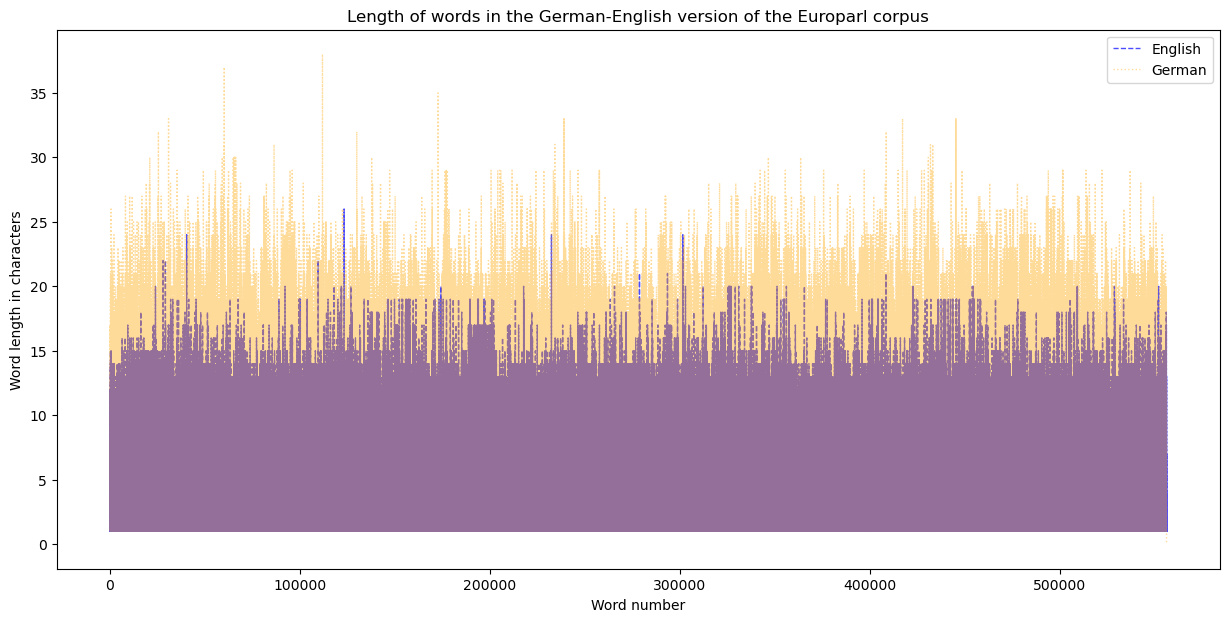

In [10]:
fig, ax = plt.subplots(figsize=(15, 7))
x = np.arange(len(en.words()))

ax.plot(x, word_len_en, color='blue', linewidth=1, linestyle='--',alpha=0.7,label='English') #value on alpha channel adds transparency
l, = ax.plot(x, word_len_ger_adjusted, color='orange', linewidth=1,alpha=0.4, label = 'German')

#labeling and design
l.set_linestyle(':');
ax.set_xlabel('Word number')
ax.set_ylabel('Word length in characters')
ax.set_title('Length of words in the German-English version of the Europarl corpus')
ax.legend();

Alternatively, we may also create a **figure containing several subplots** arranged on a grid.

In the following, we specify that the figure should have subplots arranged in 1 row and 2 columns. We can **build these subplots** by calling the plot method (here, we use *scatter()* for a scatterplot) directly on the relevant subplot, indicated as index on the *axs* variable.

To ensure that the **y-axis is equally spaced** for both subplots, we set the y-axis ticks manually using *set_yticks* (analogously, you can use *set_xticks*)

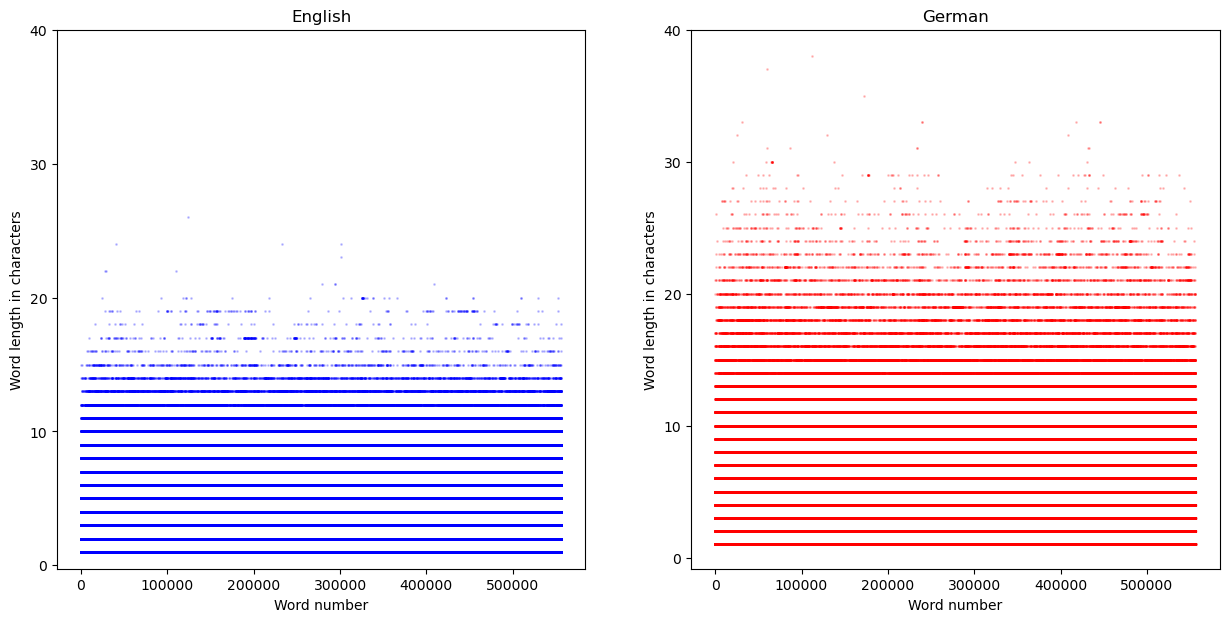

In [11]:
fig, axs = plt.subplots(1,2,figsize=(15, 7)) #"1,2" stands for the number of rows (1) and columns (2)

axs[0].scatter(x, word_len_en, color='blue',s=1, alpha=0.2, label = 'English')
axs[1].scatter(np.arange(len(ger.words())), word_len_ger, color='red',s = 1, alpha = 0.2, label = 'German')
axs[0].set_yticks([0, 10, 20, 30, 40]);
axs[1].set_yticks([0, 10, 20, 30, 40]);

axs[0].set_xlabel('Word number');
axs[0].set_ylabel('Word length in characters');
axs[1].set_xlabel('Word number');
axs[1].set_ylabel('Word length in characters');
axs[0].set_title('English');
axs[1].set_title('German');

This visualization still isn't quite satisfactory. It tells us that German words tend to be longer than English ones, but the plot design makes it difficult to extract information about the **frequency of long vs. short words**.

In the following, we therefore display sorted lists of the English/German word lengths on the y-axis.

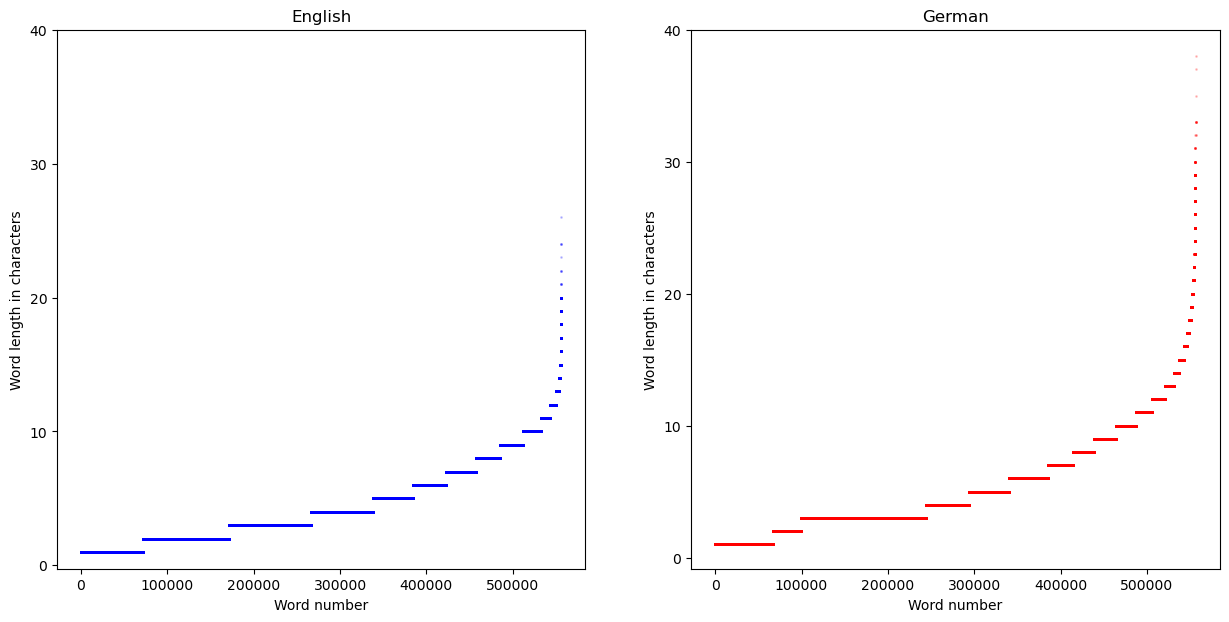

In [12]:
fig, axs = plt.subplots(1,2,figsize=(15, 7))
x = np.arange(len(en.words()))

#note the use of sorted()!
axs[0].scatter(x, sorted(word_len_en), color='blue',s=1, alpha=0.2, label = 'English')
axs[1].scatter(np.arange(len(ger.words())), sorted(word_len_ger), color='red',s = 1, alpha = 0.2, label = 'German')
axs[0].set_yticks([0, 10, 20, 30, 40]);
axs[1].set_yticks([0, 10, 20, 30, 40]);

axs[0].set_xlabel('Word number');
axs[0].set_ylabel('Word length in characters');
axs[1].set_xlabel('Word number');
axs[1].set_ylabel('Word length in characters');
axs[0].set_title('English');
axs[1].set_title('German');

### Parsing treebanks using NLTK

Treebank corpora provide a syntactic parse for each sentence. We will look at a sample of the **Penn Treebank** (the full corpus is behind a paywall).

It comes as a series of *.mrg* files, which can be read with the help of our friendly corpus reader methods.

In [13]:
from nltk.corpus import treebank

print(treebank.fileids())

['wsj_0001.mrg', 'wsj_0002.mrg', 'wsj_0003.mrg', 'wsj_0004.mrg', 'wsj_0005.mrg', 'wsj_0006.mrg', 'wsj_0007.mrg', 'wsj_0008.mrg', 'wsj_0009.mrg', 'wsj_0010.mrg', 'wsj_0011.mrg', 'wsj_0012.mrg', 'wsj_0013.mrg', 'wsj_0014.mrg', 'wsj_0015.mrg', 'wsj_0016.mrg', 'wsj_0017.mrg', 'wsj_0018.mrg', 'wsj_0019.mrg', 'wsj_0020.mrg', 'wsj_0021.mrg', 'wsj_0022.mrg', 'wsj_0023.mrg', 'wsj_0024.mrg', 'wsj_0025.mrg', 'wsj_0026.mrg', 'wsj_0027.mrg', 'wsj_0028.mrg', 'wsj_0029.mrg', 'wsj_0030.mrg', 'wsj_0031.mrg', 'wsj_0032.mrg', 'wsj_0033.mrg', 'wsj_0034.mrg', 'wsj_0035.mrg', 'wsj_0036.mrg', 'wsj_0037.mrg', 'wsj_0038.mrg', 'wsj_0039.mrg', 'wsj_0040.mrg', 'wsj_0041.mrg', 'wsj_0042.mrg', 'wsj_0043.mrg', 'wsj_0044.mrg', 'wsj_0045.mrg', 'wsj_0046.mrg', 'wsj_0047.mrg', 'wsj_0048.mrg', 'wsj_0049.mrg', 'wsj_0050.mrg', 'wsj_0051.mrg', 'wsj_0052.mrg', 'wsj_0053.mrg', 'wsj_0054.mrg', 'wsj_0055.mrg', 'wsj_0056.mrg', 'wsj_0057.mrg', 'wsj_0058.mrg', 'wsj_0059.mrg', 'wsj_0060.mrg', 'wsj_0061.mrg', 'wsj_0062.mrg', 'wsj_00

In [14]:
print(treebank.words('wsj_0004.mrg'))

['Yields', 'on', 'money-market', 'mutual', 'funds', ...]


In [15]:
print(treebank.tagged_words('wsj_0004.mrg'))

[('Yields', 'NNS'), ('on', 'IN'), ...]


In [16]:
print(treebank.parsed_sents('wsj_0005.mrg')[0])

(S
  (NP-SBJ-10
    (NP (NNP J.P.) (NNP Bolduc))
    (, ,)
    (NP
      (NP (NN vice) (NN chairman))
      (PP
        (IN of)
        (NP
          (NP (NNP W.R.) (NNP Grace) (CC &) (NNP Co.))
          (, ,)
          (SBAR
            (WHNP-10 (WDT which))
            (S
              (NP-SBJ (-NONE- *T*-10))
              (VP
                (VBZ holds)
                (NP
                  (NP (DT a) (ADJP (CD 83.4) (NN %)) (NN interest))
                  (PP-LOC
                    (IN in)
                    (NP (DT this) (JJ energy-services) (NN company))))))))))
    (, ,))
  (VP
    (VBD was)
    (VP
      (VBN elected)
      (S (NP-SBJ (-NONE- *-10)) (NP-PRD (DT a) (NN director)))))
  (. .))


Parsed sentences are **tree objects** and can be displayed as such using the *svgling* package:

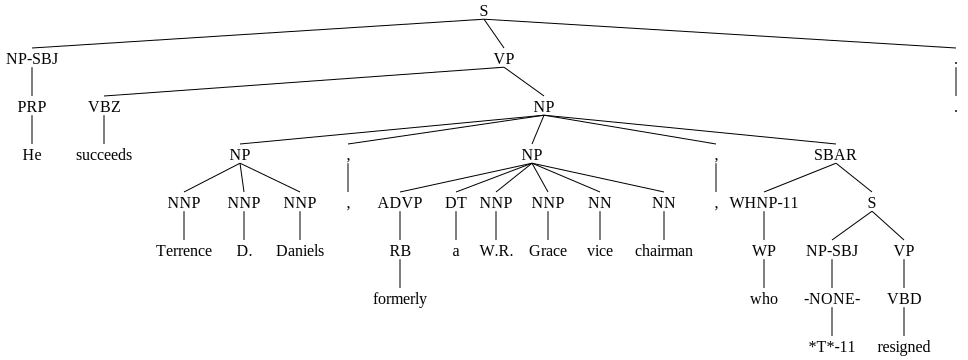

In [17]:
import svgling
t = treebank.parsed_sents('wsj_0005.mrg')[1]
t

In [18]:
t.leaves()

['He',
 'succeeds',
 'Terrence',
 'D.',
 'Daniels',
 ',',
 'formerly',
 'a',
 'W.R.',
 'Grace',
 'vice',
 'chairman',
 ',',
 'who',
 '*T*-11',
 'resigned',
 '.']

**Tagged and parsed corpora provide a great tool** if you are interested not just in a word's frequency or lexical category, but its **grammatical role within a sentence**, or if you are interested in exploring the possible structures of the target language, more generally.

Let's illustrate by writing a (hacky) function aimed to **distinguish object- from subject-extracted relative clauses**. 

2) a.  The journalist who the editor recommended __ for the assignment never took the job. (object-extracted)<br>
    &nbsp;&nbsp;&nbsp; b. The journalist who __ recommended the editor for the assignment never took the job. (subject-extracted)
    
We need to **think, first, of what the search pattern should look like**. Let's check out an instance in the corpus to help us out with this:

In [19]:
print(treebank.parsed_sents()[4])

(S
  (S-TPC-2
    (NP-SBJ
      (NP (DT The) (NN asbestos) (NN fiber))
      (, ,)
      (NP (NN crocidolite))
      (, ,))
    (VP
      (VBZ is)
      (ADJP-PRD (RB unusually) (JJ resilient))
      (SBAR-TMP
        (IN once)
        (S
          (NP-SBJ (PRP it))
          (VP (VBZ enters) (NP (DT the) (NNS lungs)))))
      (, ,)
      (PP
        (IN with)
        (S-NOM
          (NP-SBJ
            (NP (RB even) (JJ brief) (NNS exposures))
            (PP (TO to) (NP (PRP it))))
          (VP
            (VBG causing)
            (NP
              (NP (NNS symptoms))
              (SBAR
                (WHNP-1 (WDT that))
                (S
                  (NP-SBJ (-NONE- *T*-1))
                  (VP
                    (VBP show)
                    (PRT (RP up))
                    (ADVP-TMP (NP (NNS decades)) (JJ later)))))))))))
  (, ,)
  (NP-SBJ (NNS researchers))
  (VP (VBD said) (SBAR (-NONE- 0) (S (-NONE- *T*-2))))
  (. .))


A few things are worth noting:

- NP subjects are tagged as "*NP-SBJ*" but NP objects are simple tagged "*NP*"
- Relative clauses are noun complements. As such, they appear as subtree of their host-NP.
- The highest node of a relative clause is S\' ("*SBAR*")

Let's **write a function that exploits this pattern**:

In [20]:
#define function that searches for object- and subject-extracted RCs:

def rc_type(tree):
    for st in tree.subtrees():
        if st.label() == "NP":
            for stst in st.subtrees():
                if stst.label() == "SBAR":
                    for ststst in stst.subtrees():
                        if ststst.label() == "NP-SBJ":
                            if ststst[0].label() == "-NONE-":                
                                return "RC_SBJ"
                        elif ststst.label() == "NP":
                            if ststst[0].label() == "-NONE-":
                                return "RC_OBJ"
 

In [21]:
sbj_extr_RC = [];
obj_extr_RC = [];

#just doing this on the first 500 sentences as it takes quite some time to run on the full corpus
for i in range(500):
    if rc_type(treebank.parsed_sents()[i]) == "RC_SBJ":
        sbj_extr_RC.append(i)
    elif rc_type(treebank.parsed_sents()[i]) == "RC_OBJ":
        obj_extr_RC.append(i)

 

In [22]:
print("Frequency of subject-extracted RCs: \t", len(sbj_extr_RC))
print("Frequency of object-extracted RCs: \t", len(obj_extr_RC))

Frequency of subject-extracted RCs: 	 49
Frequency of object-extracted RCs: 	 19


It often takes **many rounds of trial and error** to ensure that your search pattern **finds all instances** of the structure you are looking for and **excludes all unrelated structures**. 

The function above isn't perfect. But we can have a look at its matches to identify potential problems:

In [23]:
print(obj_extr_RC)

[115, 152, 168, 188, 195, 197, 212, 215, 228, 246, 273, 329, 345, 359, 364, 417, 457, 459, 461]


This instance seems fine:

        ...the USD 2.29 billion value [United Illuminating places _ on its bid]
        

In [24]:
print(treebank.parsed_sents()[115])

(S
  (NP-SBJ-4
    (NP (NNP New) (NNP England) (NNP Electric))
    (, ,)
    (VP
      (VBN based)
      (NP (-NONE- *))
      (PP-LOC-CLR
        (IN in)
        (NP (NP (NNP Westborough)) (, ,) (NP (NNP Mass.)))))
    (, ,))
  (VP
    (VBD had)
    (VP
      (VBN offered)
      (NP
        (NP (QP ($ $) (CD 2) (CD billion)) (-NONE- *U*))
        (PP (-NONE- *ICH*-1)))
      (S-PRP
        (NP-SBJ (-NONE- *-4))
        (VP
          (TO to)
          (VP
            (VB acquire)
            (NP
              (NP (NNP PS))
              (PP (IN of) (NP (NNP New) (NNP Hampshire)))))))
      (, ,)
      (PP-1
        (ADVP (RB well))
        (IN below)
        (NP
          (NP
            (NP
              (DT the)
              (ADJP (QP ($ $) (CD 2.29) (CD billion)) (-NONE- *U*))
              (NN value))
            (SBAR
              (WHNP-2 (-NONE- 0))
              (S
                (NP-SBJ (NNP United) (NNP Illuminating))
                (VP
                  (NNS places)
     

But below our search pattern for object-extracted relative clauses fails because the RC contains several gaps:

    imports of certain watches [ that __ aren't produced __ in significant quantities in the US, the Virgin Islands, or other US possessions].  

In [25]:
print(treebank.parsed_sents()[273])

(S
  (NP-SBJ (DT The) (NNP White) (NNP House))
  (VP
    (VBD said)
    (SBAR
      (-NONE- 0)
      (S
        (NP-SBJ (NNP President) (NNP Bush))
        (VP
          (VBZ has)
          (VP
            (VBN approved)
            (NP
              (NP (JJ duty-free) (NN treatment))
              (PP
                (IN for)
                (NP
                  (NP (NNS imports))
                  (PP
                    (IN of)
                    (NP
                      (NP (JJ certain) (NNS types))
                      (PP (IN of) (NP (NNS watches)))
                      (SBAR
                        (WHNP-35 (WDT that))
                        (S
                          (NP-SBJ-1 (-NONE- *T*-35))
                          (VP
                            (VBP are)
                            (RB n't)
                            (VP
                              (VBN produced)
                              (NP (-NONE- *-1))
                              (PP-MNR
             

Further improvements to the search function could be made. But even so, **sometimes a corpus just does not contain all the necessary annotations to uniquely identify a particular pattern**. Manual annotation of (a limited number of) search results is still quite common in corpus-based research.

### Further resources on NLTK and matplotlib

**NLTK** comes with great documentation and an online book that walks you through many of its basic use cases:
- https://www.nltk.org/book/
- written for beginners; can serve as general introduction to text processing in Python

**Matplotlib** has extensive online resouces, from simple visualizations like the ones we saw today to highly sophisticated illustrations.
- https://matplotlib.org/stable/tutorials/index
- Split into different levels of difficulty
- These tutorials expect familiarity with Python and aren't terribly friendly for beginners